<center><h1>ETI195: Ética para Ciencia de Datos y Estadística</h1><center>
<h2>Privacidad diferencial</h2>

En este taller introduciremos el concepto de Privacidad Diferencial, técnica que tiene por objetivo proteger la privacidad de los datos mientras se preserva la utilidad de estos para ser analizados.

## Introducción

En sí, la privacidad diferencial constituye una promesa de los responsables de los datos:  "No serás afectado de manera adversa o de otro modo al permitir que tus datos sean utilizados en cualquier estudio."

Uno de los enfoques más simples para la privacidad diferencial es "Randomized Response" o respuesta aleatorizada o randomizada. Supongamos que necesitamos acceder a información sensible mediante una encuesta, por ejemplo, una encuesta sobre infidelidad. Es claro que muchas personas tenderán a negarse a responder esta encuesta si su privacidad no está garantizada. ¿Cómo podemos cuantificar qué fracción de la población es infiel (en este ejemplo), asegurando que la privacidad de los participantes estará a salvo?

Vamos caso por caso. Tengamos en consideración que la respuesta a esta pregunta solo toma valores sí/no:

- La primera opción sería recibir las respuestas verdaderas de cada encuestado; en este caso, la respuesta es igual a la verdad del encuestado y por ende no tenemos privacidad.

- La segunda opción es que se responda sí/no de manera aleatoria, ambos con probabilidad 0,5. En este caso la privacidad es "perfecta", pues la respuesta **no tiene relación con la verdad**, es decir, no podemos deducir la verdadera situación de un encuestado viendo su respuesta, pues independiente de su verdad la probabilidad de responder sí o no es la misma. Por ende la encuesta pierde también su accuracy, y no es posible realizar inferencias a partir de esta.

- Para la tercera opción, denotemos por $X_i$ (1: sí, 0: no) la verdad del encuestado, y por $Y_i$ (1: sí, 0: no) la respuesta de este. Pensemos en el siguiente esquema de respuesta:

$$
Y_i =
\begin{cases}
  X_i, & \text{con probabilidad } \frac{1}{2} + \gamma \\
  1 - X_i , & \text{con probabilidad } \frac{1}{2} - \gamma
\end{cases}
$$


Es decir, el encuestado dice la verdad con probabilidad $\frac{1}{2} + \gamma$ y miente con probabilidad $\frac{1}{2} - \gamma$. Notemos que en este caso existe lo que llamamos "negabilidad plausible" pues si tomamos un valor de, por ejemplo $\gamma = 0.25$ , la respuesta del encuestado será la verdad con probabilidad 0.75 y no será la verdad con probabilidad 0.25. Qué tan negable es la respuesta otorgada está relacionado directamente con el nivel de privacidad.

## Aplicación de Randomized Response con lanzamiento de monedas.

Consideremos nuevamente la pregunta: ¿Es usted infiel? y considere el siguiente esquema de respuesta:

![Randomized Response Coin Flip](https://www.researchgate.net/publication/359729213/figure/fig1/AS:1141344529592321@1649129149405/Summary-of-randomized-response-method-with-unbiased-coins-ie-with-equal-1-2.png)

Supongamos entonces que una persona ha sido infiel. ¿Con qué probabilidad responderá que ha sido infiel? Tenemos que:

$$
P(Y_i = 1 | X_i = 1) = P(Cara)\cdot\frac{1}{2} + P(Sello)
$$


$$
\Leftrightarrow P(Y_i = 1 | X_i = 1) = \frac{1}{2}\cdot\frac{1}{2} + \frac{1}{2} = 0.75
$$

De forma similar, podemos calcular la probabilidad de que una persona diga que no ha sido infiel dado que sí lo ha sido:


$$
P(Y_i = 0 | X_i = 1) = P(Cara)\cdot\frac{1}{2} = 0.25
$$


Simulemos como sería el algoritmo de respuesta en este caso:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

np.random.seed(2)


def CoinFlipRR(X):

    # Lanzamos la primera moneda
    coin_1 = np.random.choice(["Cara", "Sello"], p=[0.5, 0.5])

    # Si la primera respuesta fue sello, se debe responder con la verdad.
    if coin_1 == "Sello":
        y = X
        return y

    else:
        coin_2 = np.random.choice(["Cara", "Sello"], p=[0.5, 0.5])

        # Supondremos que con cara se debe responder que sí, independiente de la verdad.
        if coin_2 == "Cara":
            y = 1
            return y

        # Supondremos que con sello se debe responder que no, independiente de la verdad.
        else:
            y = 0
            return y

In [2]:
n_sim = 2000
results = []
for i in range(10):
    result = CoinFlipRR(1)
    results.append(result)

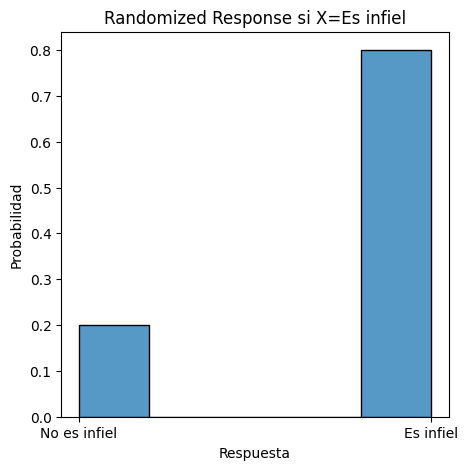

In [3]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(results, stat="probability")
ax.set_xticks([0, 1])
ax.set_xticklabels(["No es infiel", "Es infiel"])
ax.set_title("Randomized Response si X=Es infiel")
ax.set_xlabel("Respuesta")
ax.set_ylabel("Probabilidad")
plt.show()

In [4]:
results_2 = []
for i in range(10):
    result = CoinFlipRR(0)
    results_2.append(result)

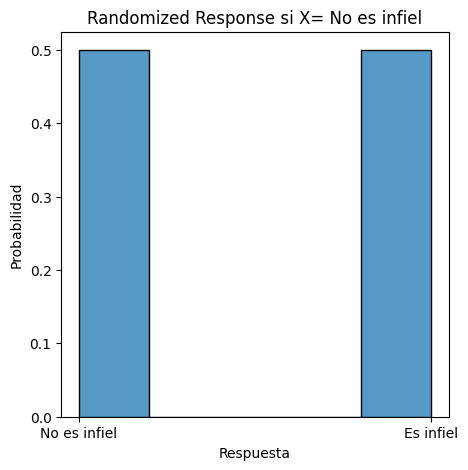

In [5]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(results_2, stat="probability")
ax.set_xticks([0, 1])
ax.set_xticklabels(["No es infiel", "Es infiel"])
ax.set_title("Randomized Response si X= No es infiel")
ax.set_xlabel("Respuesta")
ax.set_ylabel("Probabilidad")
plt.show()

## Estimación de las cantidades verdaderas.

Ahora buscamos, a partir del número de respuestas recibidas, estimar las cantidades verdaderas (en este caso la proporción de personas infieles dentro de las encuestadas). Denotemos por $R_+$ la cantidad de encuestados que responden afirmativamente, $N_{-}$ la cantidad de encuestados que no ha sido infiel, $N_{+}$ la cantidad de encuestados que sí ha sido infiel y $n$ el total de encuestados. Luego tenemos que:

$R_+ = 0.25\cdot N_{-} + 0.75 \cdot N_{+}$


$\Leftrightarrow R_+ = 0.25\cdot(n-N_{+}) + 0.75\cdot N_{+}$

$\Leftrightarrow R_+ = 0.25\cdot n- 0.25 \cdot N_{+} + 0.75\cdot N_{+}$

$\Leftrightarrow R_+ = 0.25\cdot n + 0.5\cdot N_{+}$

$\Leftrightarrow 2\cdot R_+ = 0.5\cdot n + N_{+}$

$\Leftrightarrow N_{+} = 2 \cdot R_{+} - 0.5 \cdot n$

donde $N_{+}$ es la estimación de la cantidad de encuestados que ha sido infiel. Luego, haciendo uso del método de Randomized Response, podemos estimar la proporción de los encuestados que es infiel asegurando cierto nivel de privacidad. Finalmente, cabe preguntarse ¿Cómo cuantificamos el nivel de privacidad otorgado por este método? Para ello debemos dar una definición más formal de privacidad diferencial.

Diremos que un algoritmo $M$ (en este caso Randomized Response) es $\epsilon$-diferencialmente privado si y solo si para cada par de inputs $X$ y $X'$ que difieren en un solo una entrada y para todos los outputs T plausibles tenemos que:

<br>$P(M(X)\in T) = e^\epsilon P(M(X')\in T)$</br>

En nuestro caso de Randomized Response con una moneda, la condición quedaría como:

<br>$P(Y=1|X=1) = e^\epsilon P(Y=0|X=1)$</br>

<br>$\Leftrightarrow ln(\frac{P(Y=1|X=1)}{P(Y=0|X=1)}) = \epsilon$</br>



Por lo que en este caso obtenemos:

In [6]:
epsilon = np.log(0.75 / 0.25)
print(f"Randomized Response es {epsilon}-diferencialmente privado")

Randomized Response es 1.0986122886681098-diferencialmente privado


Algunas consideraciones:

- Menores valores de epsilon implican una mayor privacidad.
- El valor de epsilon debería ser pequeño, del orden de $10^{-1}$ o $10^0$.

Ahora veremos DataSynthesizer (Ping et al., 2017), una herramienta que nos permite crear datos sintéticos a partir de un dataset con datos sensibles. Estos datos sintéticos son tanto estructuralmente como estadísticamente similares a los datos originales.

Una de las problemáticas al trabajar con datos sensibles es la disponibilización de estos para la colaboración en projectos de por ejemplo bienestar social o salud. Esto supone un gran contratiempo a la hora de llevar adelante tales proyectos. Una solución para este problema es trabajar con datos sintéticos que sean estructuralmente y estadísticamente similares a los datos originales y que ofrezcan fuertes garantías de privacidad. De esta forma, los cientistas de datos pueden desarrollar modelos y métodos sobre estos datos sintéticos, con cierto grado de confianza de que este trabajo será significativo cuando se aplique sobre los datos reales. DataSynthesizer nos permite obtener tales datos sintéticos.

## ¿Cómo funciona DataSynthesizer?

La arquitectura de DataSynthesizer se basa en 3 componentes: DataDescriber, DataGenerator y ModelInspector.

1. DataDescriber: Se encarga de procesar el dataset input. Obtiene los dominios de cada uno de los atributos además de inferir las distribuciones estimadas de cada uno. Esta información es almacenada en un archivo que describe el dataset. Puede ser invocado en 3 modos:
- Independent attribute mode, donde la distribución de cada atributo es independiente del resto de los atributos.
- Correlated attribute mode, que usa un algoritmo que construye redes bayesianas para modelar los atributos correlacionados. Así las distribuciones de cada atributo están condicionadas sobre otros atributos (ej. ingresos y edad).

- Random mode, que simplemente genera valores aleatorios para los atributos (que sigan teniendo sentido) sampleando sobre una distribución uniforme.

Cada uno de estos modos implementa distintos métodos de privacidad diferencial.

¿Cuál usamos? En (Ping et al., 2017) se menciona:

> En los casos en los que Correlated attribute mode sea demasiado costoso desde el punto de vista computacional o cuando no haya datos suficientes para derivar un modelo razonable, se puede utilizar Independent attribute mode (...). Finalmente, para casos de datos extremadamente sensibles, se puede usar el modo aleatorio que simplemente genera valores aleatorios consistentes con el tipo para cada atributo.


2. DataGenerator: Toma como input el archivo de descripción del dataset generado por DataDescriber y samplea desde las distribuciones en este archivo. Se puede especificar el número de registros deseados.

3. ModelInspector: Provee de funciones para inspeccionar la similitud entre el input (privado) y los datos sintéticos (output). Los atributos en datos sintéticos deberían tener distribuciones similares a los atributos en los datos originales.

Veremos la implementación de esta herramienta sobre el dataset `adult data` que ya hemos trabajado en otras ocasiones, en este caso utilizaremos una versión que se encuentra disponible en el [repositorio de DataSynthesizer](https://github.com/DataResponsibly/DataSynthesizer).



In [7]:
# Instalamos la librería.
%pip install DataSynthesizer


Note: you may need to restart the kernel to use updated packages.


In [8]:
# Importamos librerías a utilizar
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# DataSynthesizer
from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import read_json_file

In [9]:
# Iniciamos leyendo nuestros datos originales.
source = "https://raw.githubusercontent.com/DataResponsibly/DataSynthesizer/master/notebooks/data/adult_reduced.csv"
adult = pd.read_csv(source)
adult.head()

,age,education,sex,relationship,marital-status,income
0,39,Bachelors,Male,Not-in-family,Never-married,<=50K
1,50,Bachelors,Male,Husband,Married-civ-spouse,<=50K
2,38,HS-grad,Male,Not-in-family,Divorced,<=50K
3,53,11th,Male,Husband,Married-civ-spouse,<=50K
4,28,Bachelors,Female,Wife,Married-civ-spouse,<=50K


In [10]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   education       32561 non-null  object
 2   sex             32561 non-null  object
 3   relationship    32561 non-null  object
 4   marital-status  32561 non-null  object
 5   income          32561 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.5+ MB


Tenemos un total de 32561 datos, con atributos de edad, educación, sexo, relación, estado marital e ingresos. Pasemos ahora a DataSynthesizer. Lo primero será instanciar a DataDescriber y DataGenerator.

In [11]:
# Instanciamos a DataDescriber y DataGenerator.
describer = DataDescriber()
generator = DataGenerator()

## Usando DataDescriber.

El procedimiento para DataDescriber es el siguiente:

- Obtener la descripción del dataset en alguno de los modos.
- Guardar dicha descripción en un archivo local (en formato JSON).

### Independent attribute mode.

In [12]:
# Generamos la descripción del dataset.
describer.describe_dataset_in_independent_attribute_mode(source)

In [13]:
# Guardamos la descripción en un archivo local.
describer.save_dataset_description_to_file("independent.json")

### Correlated attribute mode.

In [14]:
# Generamos la descripción del dataset.
describer.describe_dataset_in_correlated_attribute_mode(source)

================ Constructing Bayesian Network (BN) ================
Adding ROOT relationship
Adding attribute marital-status
Adding attribute sex
Adding attribute education
Adding attribute age
Adding attribute income
========================== BN constructed ==========================


In [15]:
# Guardamos la descripción en un archivo local.
describer.save_dataset_description_to_file("correlated.json")

### Random mode

In [16]:
# Generamos la descripción del dataset
describer.describe_dataset_in_random_mode(source)

In [17]:
# Guardamos la descripción en un archivo local.
describer.save_dataset_description_to_file("random.json")

## Usando DataGenerator.

Ahora usamos las descripciones obtenidas anteriormente para generar datos sintéticos.

### Independent attribute mode.


In [18]:
# Generamos los datos sintéticos.
generator.generate_dataset_in_independent_mode(
    n=2000, description_file="independent.json", seed=0
)

In [19]:
# Guardamos los datos sintéticos.
generator.save_synthetic_data("independent.csv")

In [20]:
# Veamos que efectivamente se han creado datos sintéticos.

independent = pd.read_csv("independent.csv")
independent.head()

,age,education,sex,relationship,marital-status,income
0,42.0,Some-college,Female,Husband,Married-civ-spouse,<=50K
1,45.0,HS-grad,Male,Not-in-family,Married-civ-spouse,<=50K
2,40.0,HS-grad,Female,Other-relative,Never-married,<=50K
3,36.0,Bachelors,Male,Not-in-family,Married-civ-spouse,<=50K
4,33.0,HS-grad,Female,Husband,Divorced,<=50K


### Correlated attribute mode.

In [21]:
# Generamos los datos sintéticos.
generator.generate_dataset_in_correlated_attribute_mode(n=2000, description_file="correlated.json", seed=0)

In [22]:
# Guardamos los datos sintéticos.
generator.save_synthetic_data("correlated.csv")

In [23]:
# Veamos que efectivamente se han creado datos sintéticos.

correlated = pd.read_csv("correlated.csv")
correlated.head()

,age,education,sex,relationship,marital-status,income
0,53.0,Prof-school,Female,Other-relative,Never-married,<=50K
1,85.0,9th,Male,Own-child,Never-married,<=50K
2,22.0,Some-college,Female,Own-child,Never-married,<=50K
3,43.0,Bachelors,Male,Other-relative,Divorced,<=50K
4,70.0,Doctorate,Male,Not-in-family,Widowed,>50K


### Random mode.

En este caso debemos especificar un máximo y mínimo para la distribución uniforme de donde se samplean los datos.

In [24]:
# Generamos los datos sintéticos.
generator.generate_dataset_in_random_mode(
    n=2000, description_file="random.json", seed=0, minimum=0, maximum=100
)

In [25]:
# Guardamos los datos sintéticos.
generator.save_synthetic_data("random.csv")

In [26]:
# Veamos que efectivamente se han creado datos sintéticos.

random = pd.read_csv("random.csv")
random.head()

,age,education,sex,relationship,marital-status,income
0,44,10th,Male,Wife,Divorced,>50K
1,47,1st-4th,Male,Husband,Married-AF-spouse,>50K
2,64,Assoc-acdm,Male,Wife,Married-AF-spouse,<=50K
3,67,5th-6th,Male,Other-relative,Separated,<=50K
4,67,Prof-school,Female,Husband,Divorced,<=50K


## Usando ModelInspector.

Ahora utilizaremos ModelInspector para comparar las distribuciones entre los datos originales y los distintos datos sintéticos. Instanciamos a ModelInspector para cada uno de los casos.

### Independent attribute mode.

In [27]:
# Instanciamos ModelInspector
independent_description = read_json_file("independent.json")["attribute_description"]
i_inspector = ModelInspector(adult, independent, independent_description)

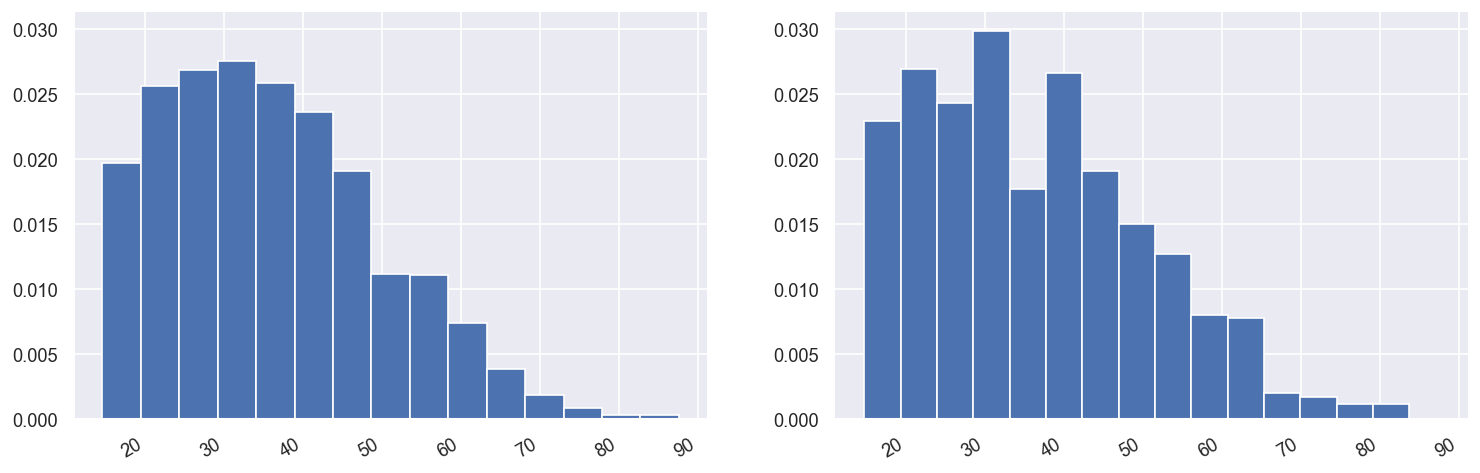

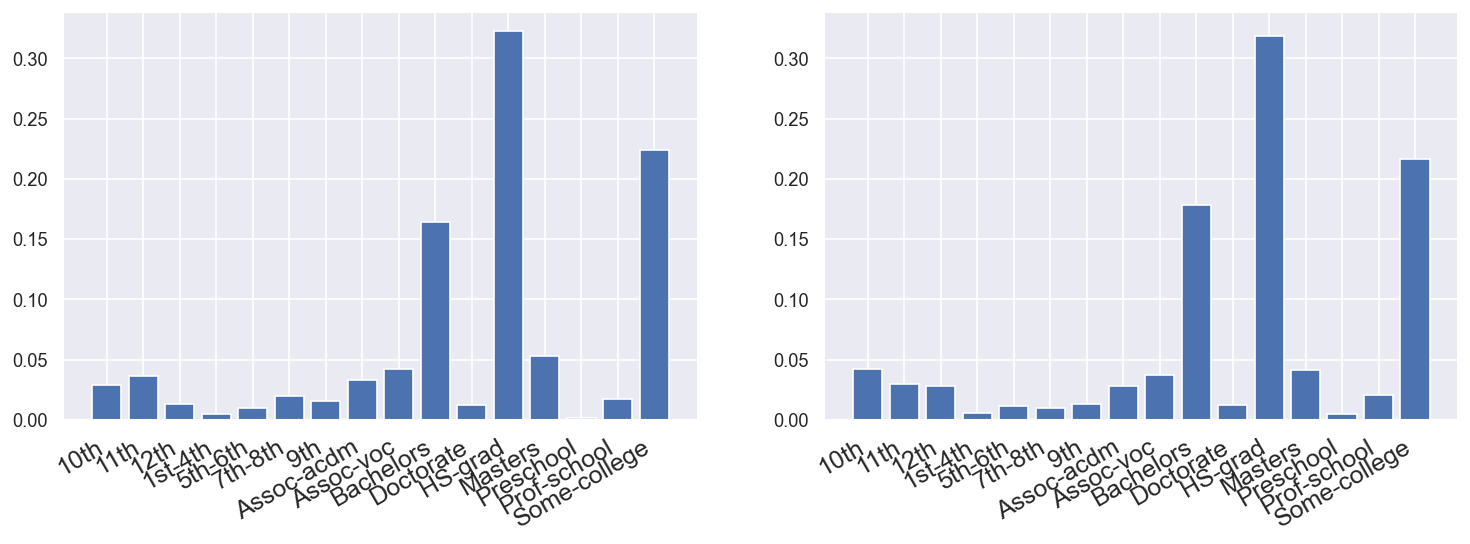

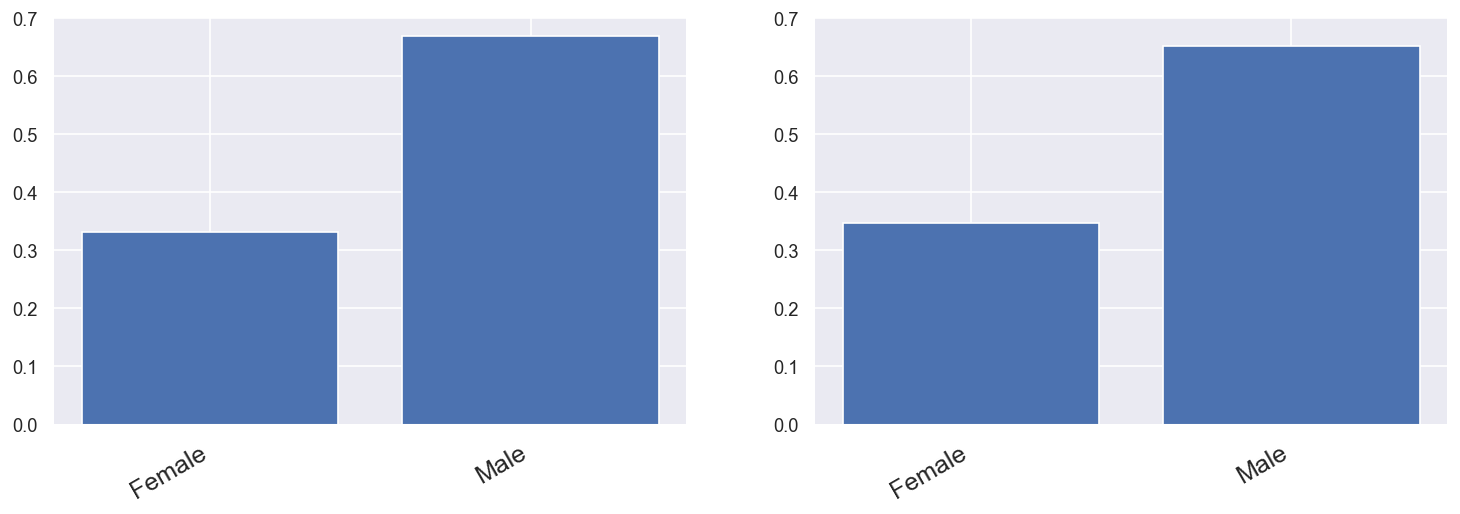

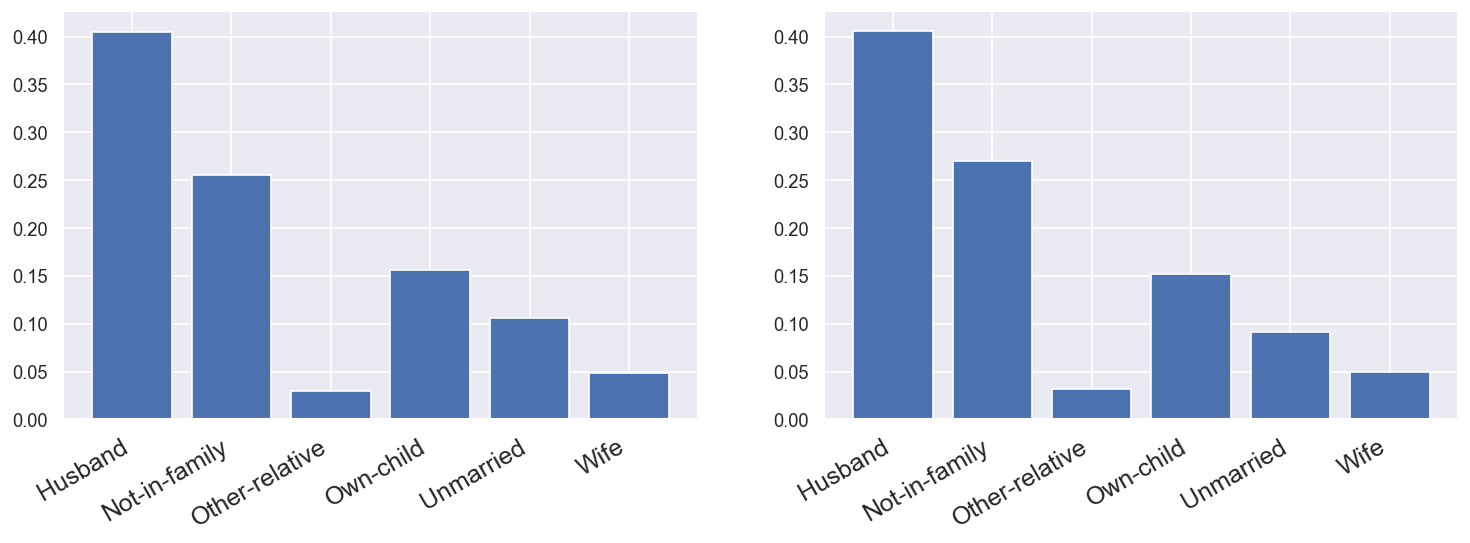

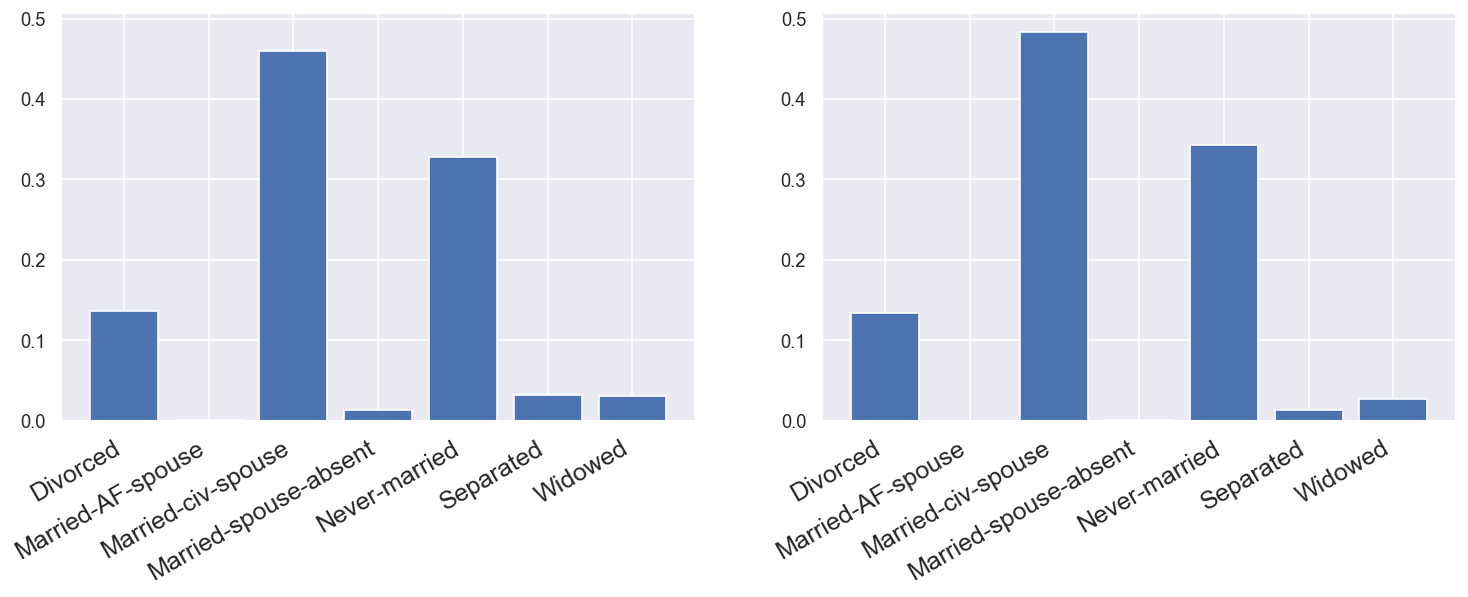

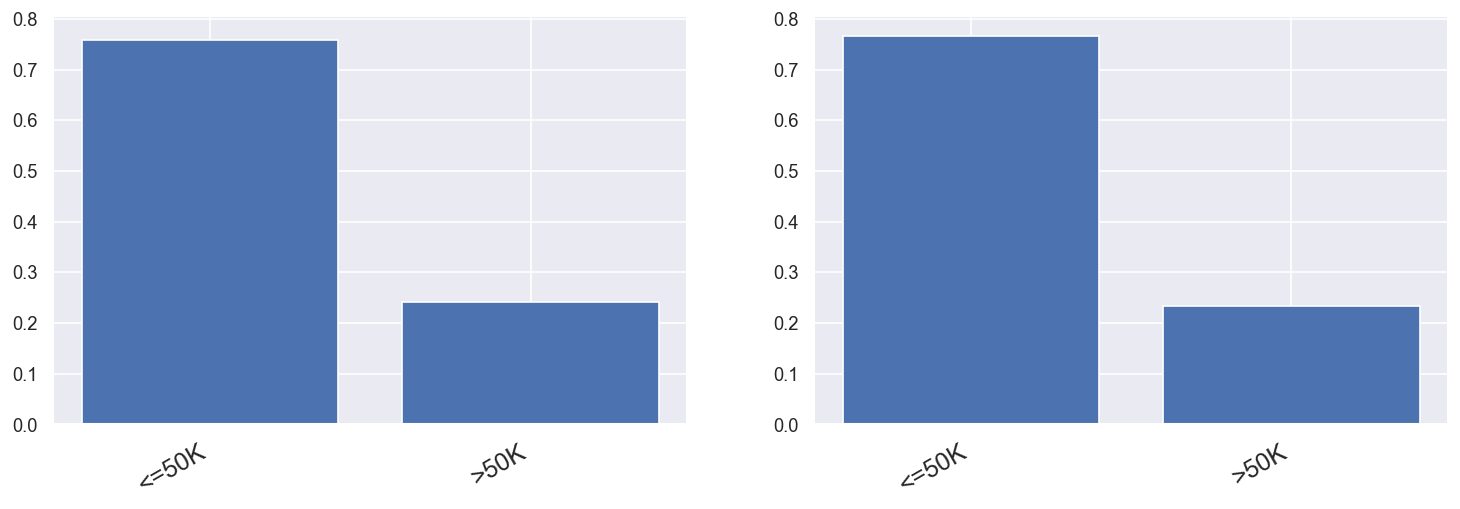

In [28]:
# Con ModelInspector podemos comparar las distribuciones de los atributos.

for attr in independent.columns:
    i_inspector.compare_histograms(attr)

Podemos ver que las distribuciones de los atributos entre ambos datasets son bastante similares, pero ¿qué ocurre con las correlaciones de estos atributos? Podemos comprobar la situación con `mutual_information_heatmap`.

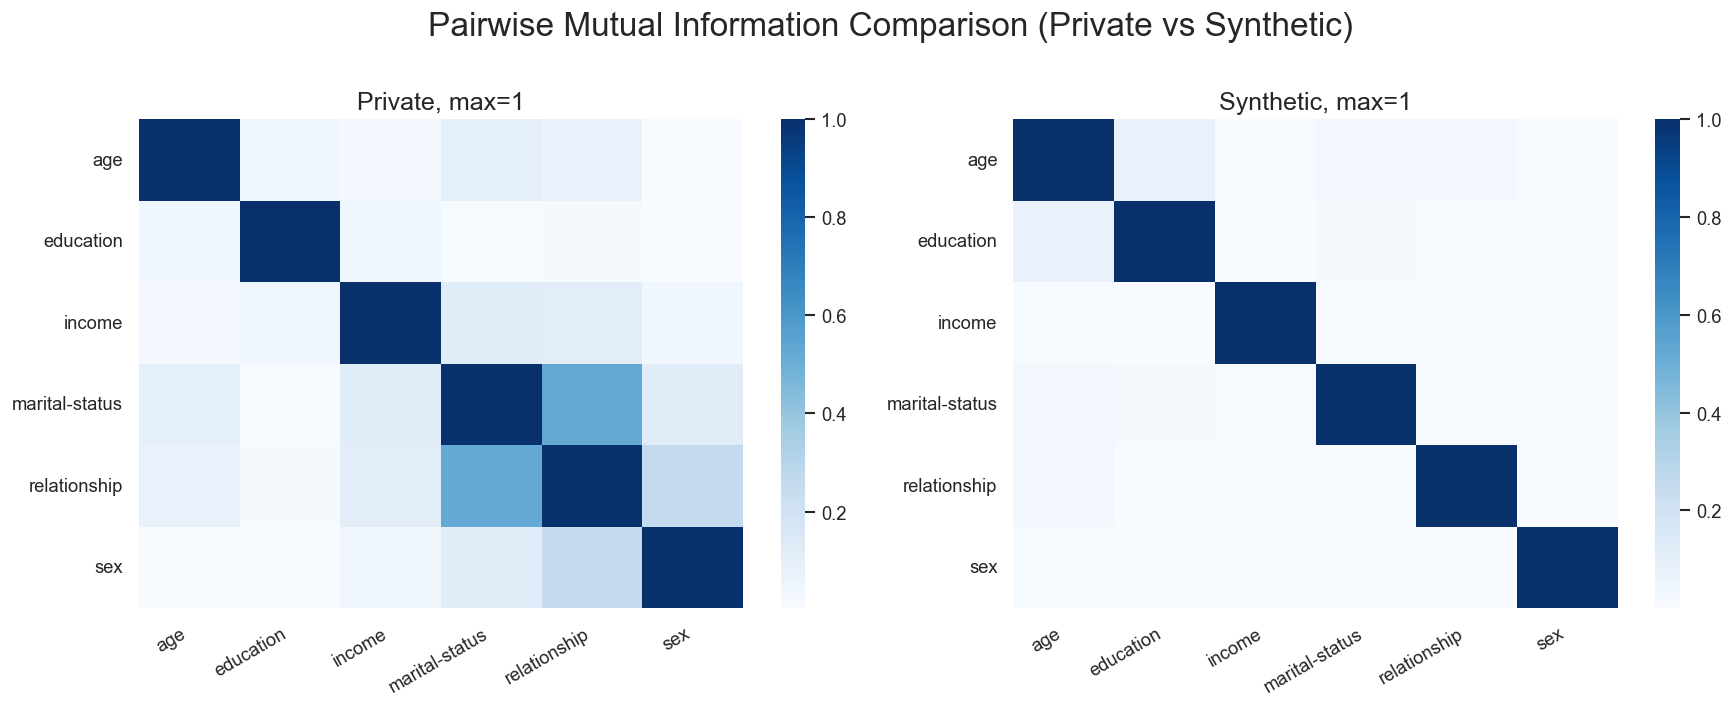

In [29]:
i_inspector.mutual_information_heatmap()

### Correlated attribute mode.

In [30]:
# Instanciamos ModelInspector

correlated_description = read_json_file("correlated.json")["attribute_description"]
c_inspector = ModelInspector(adult, correlated, correlated_description)

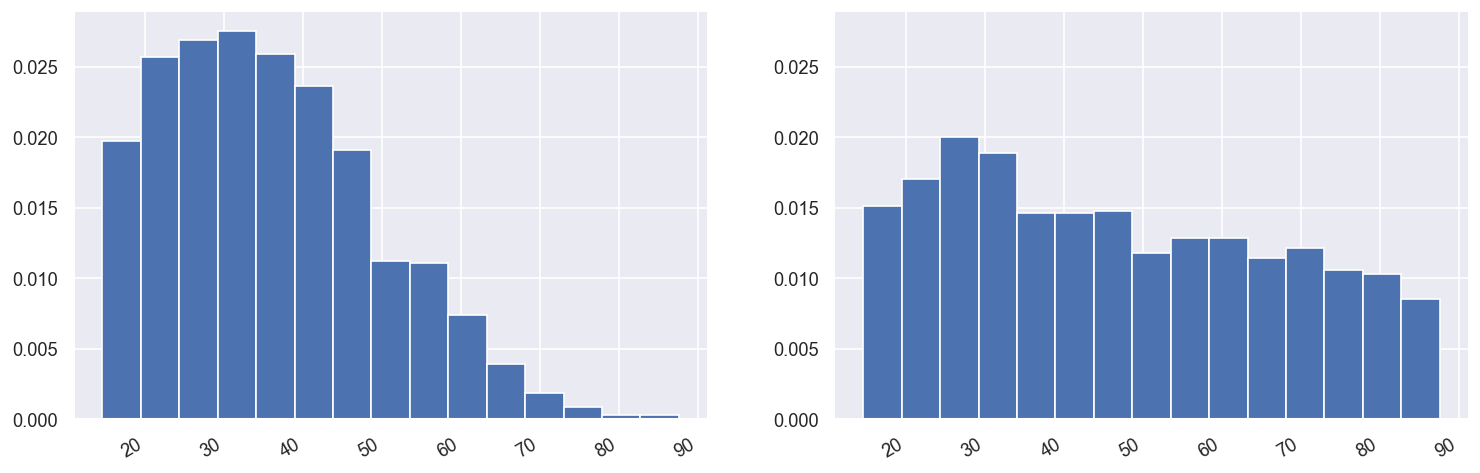

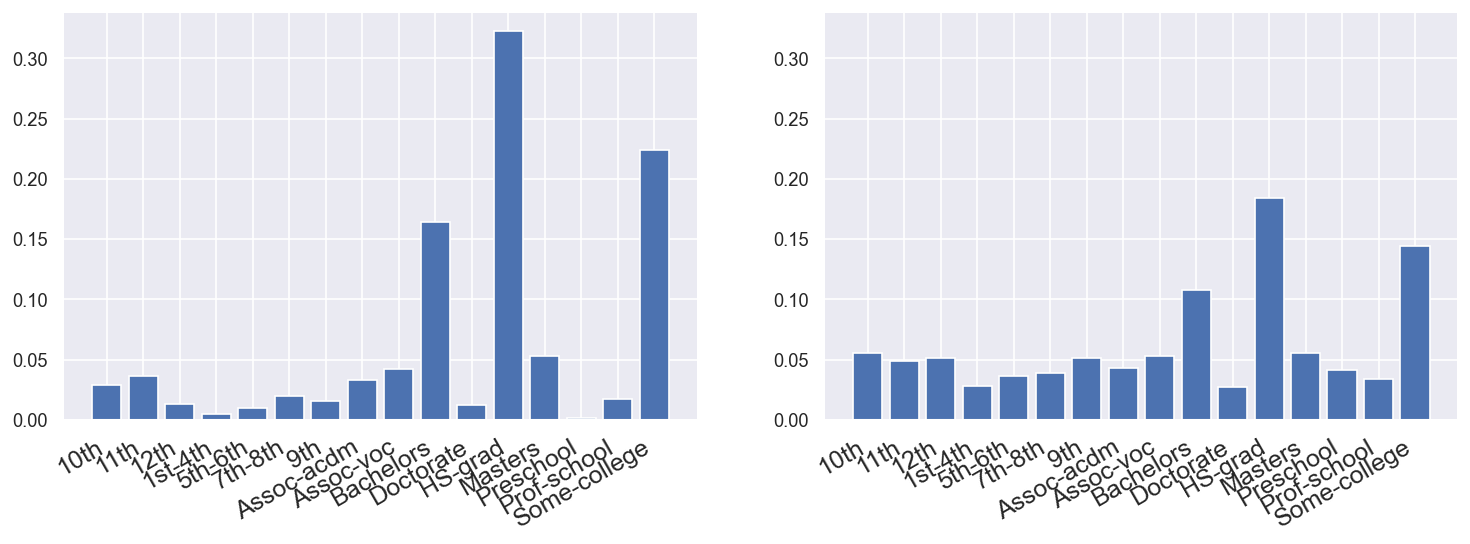

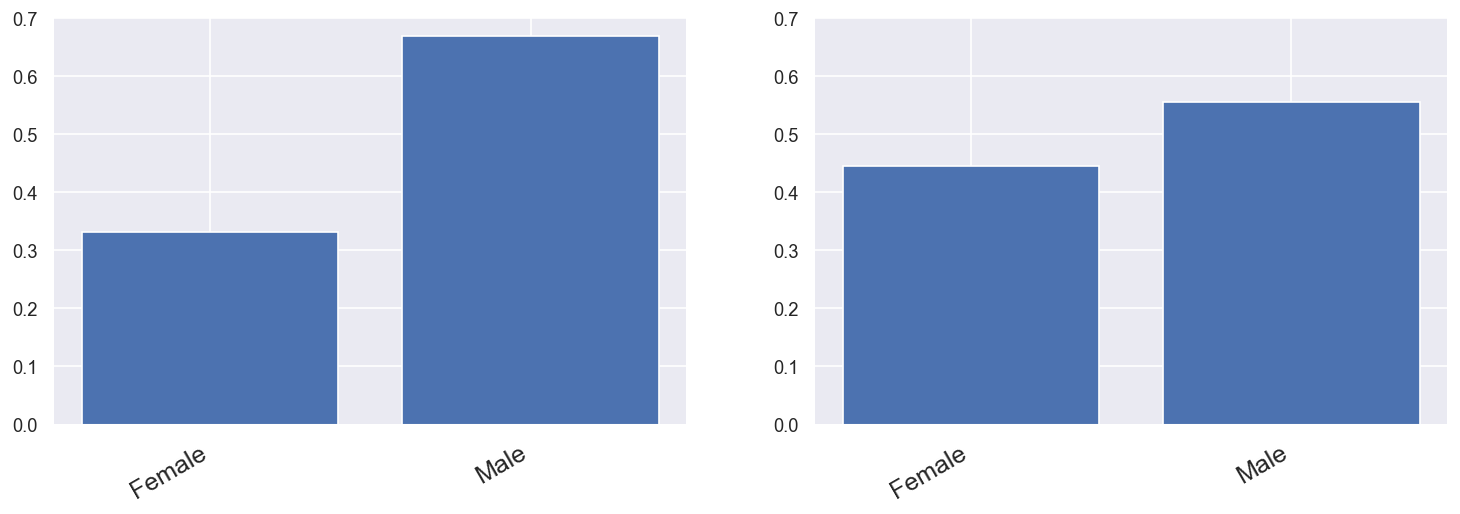

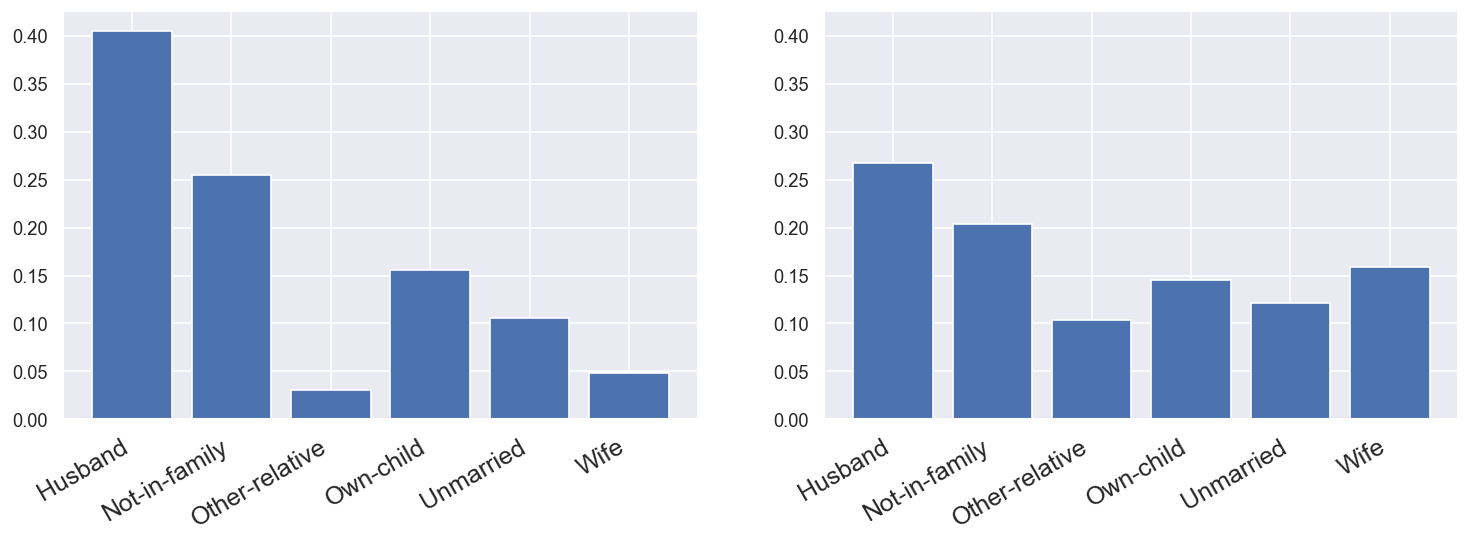

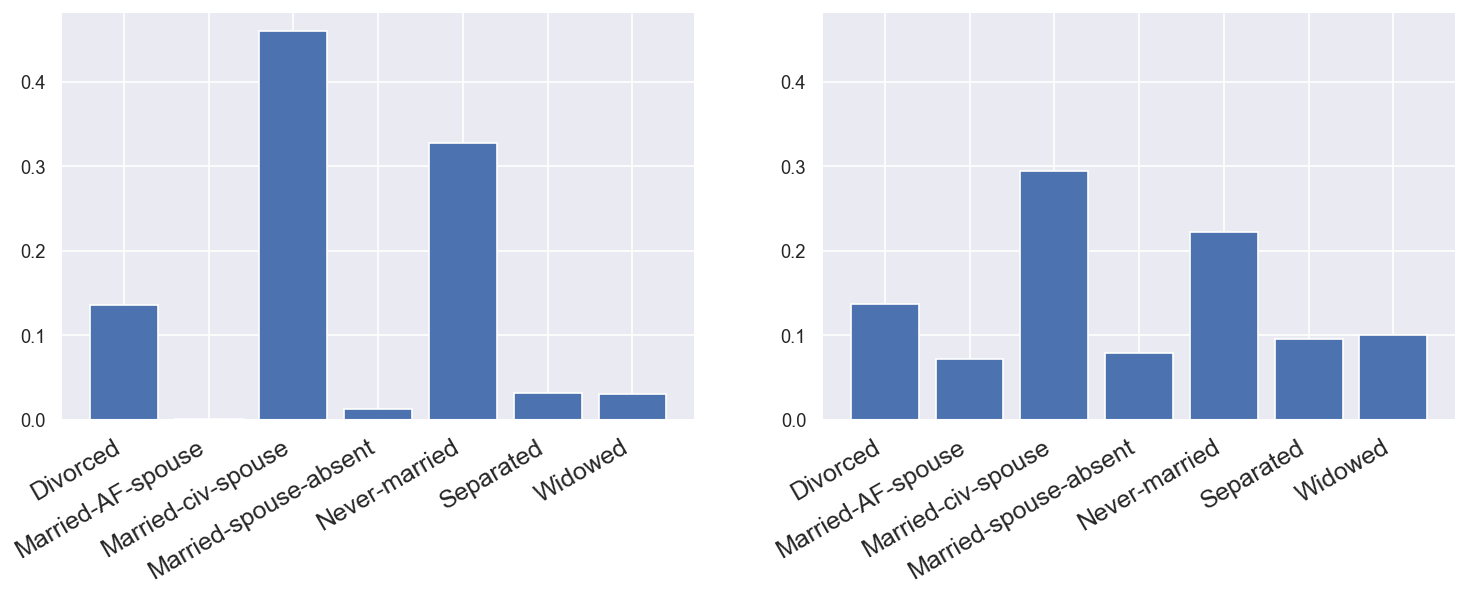

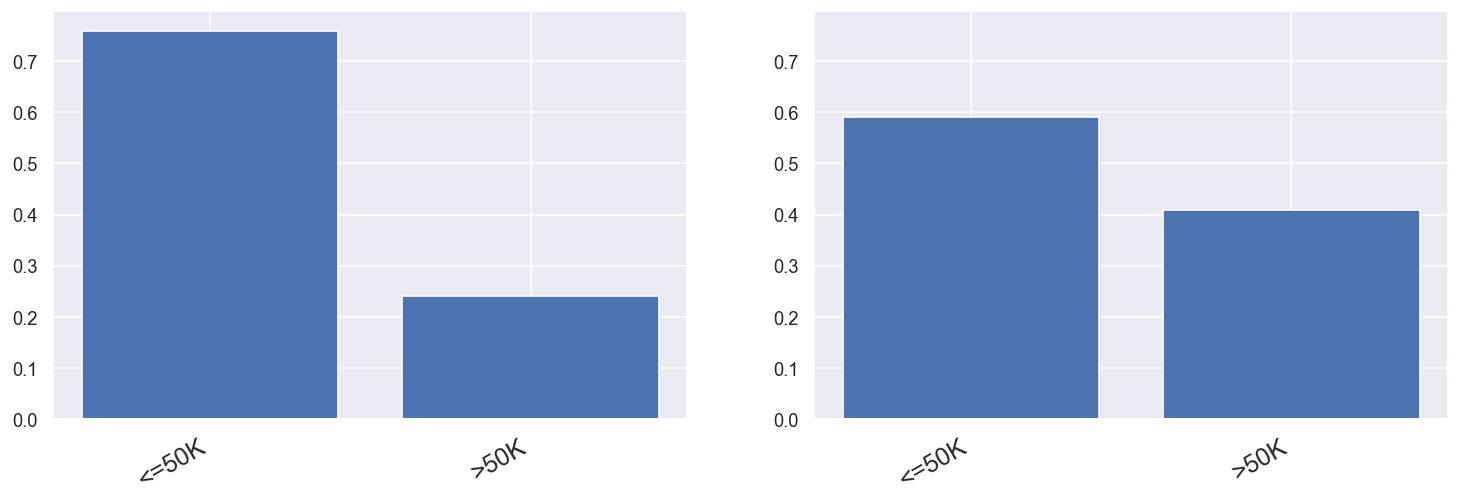

In [31]:
# Con ModelInspector podemos comparar las distribuciones de los atributos.

for attr in correlated.columns:
    c_inspector.compare_histograms(attr)

En este caso podemos observar que las distribuciones son ligeramente distintas entre ambos datasets. ¿Qué sucede con la correlación entre los atributos?

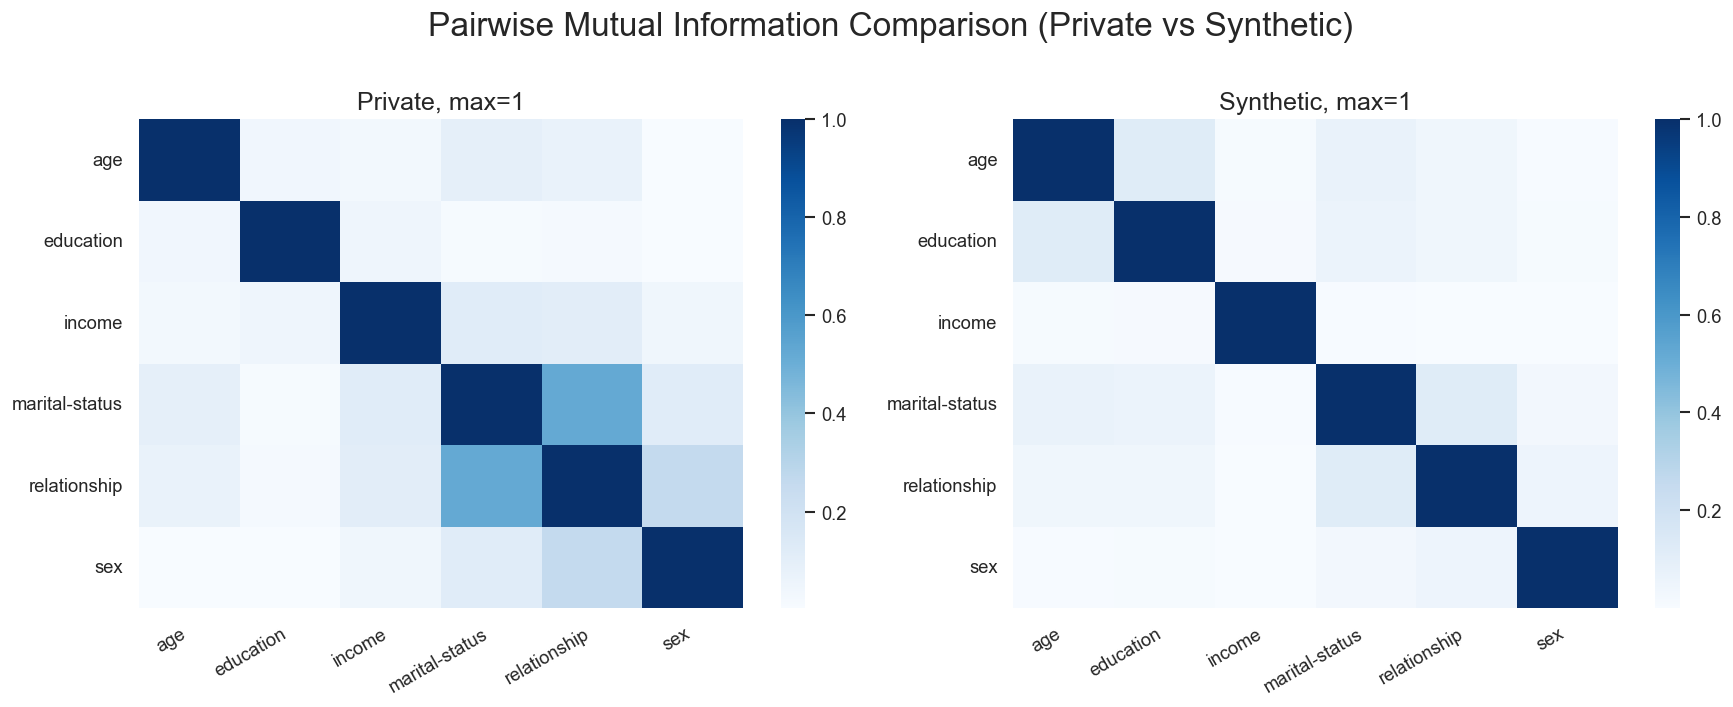

In [32]:
c_inspector.mutual_information_heatmap()

Podemos observar que aunque las distribuciones difieren entre ambos datasets, este modo captura de mejor forma las correlaciones existentes entre los atributos.

### Random mode.

In [33]:
# Instanciamos ModelInspector

random_description = read_json_file("random.json")["attribute_description"]
r_inspector = ModelInspector(adult, random, random_description)

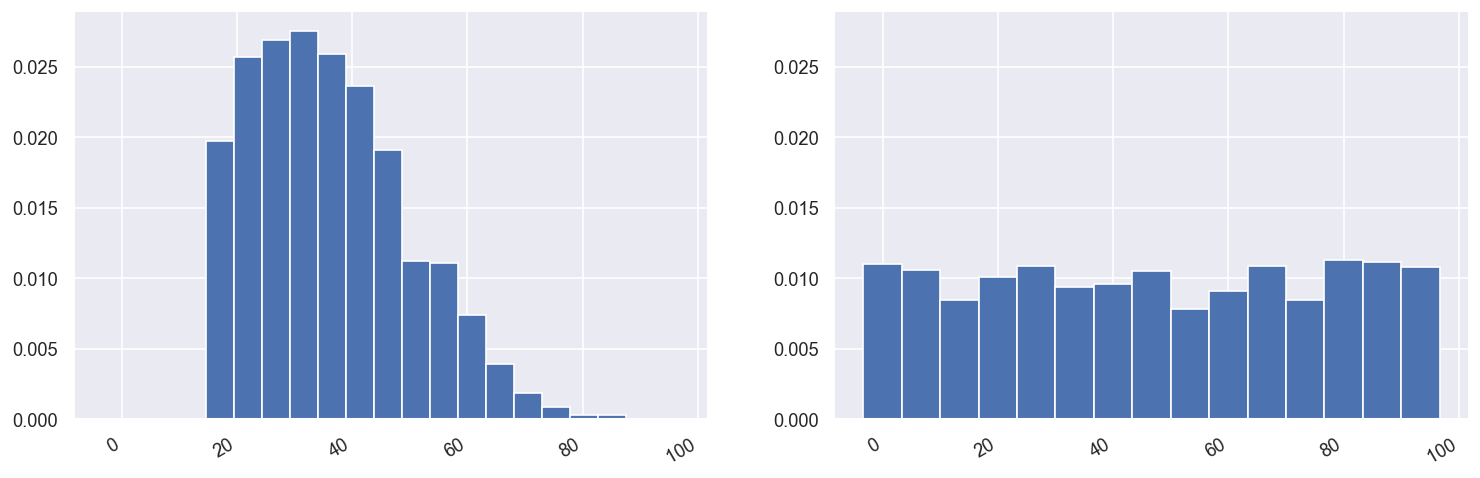

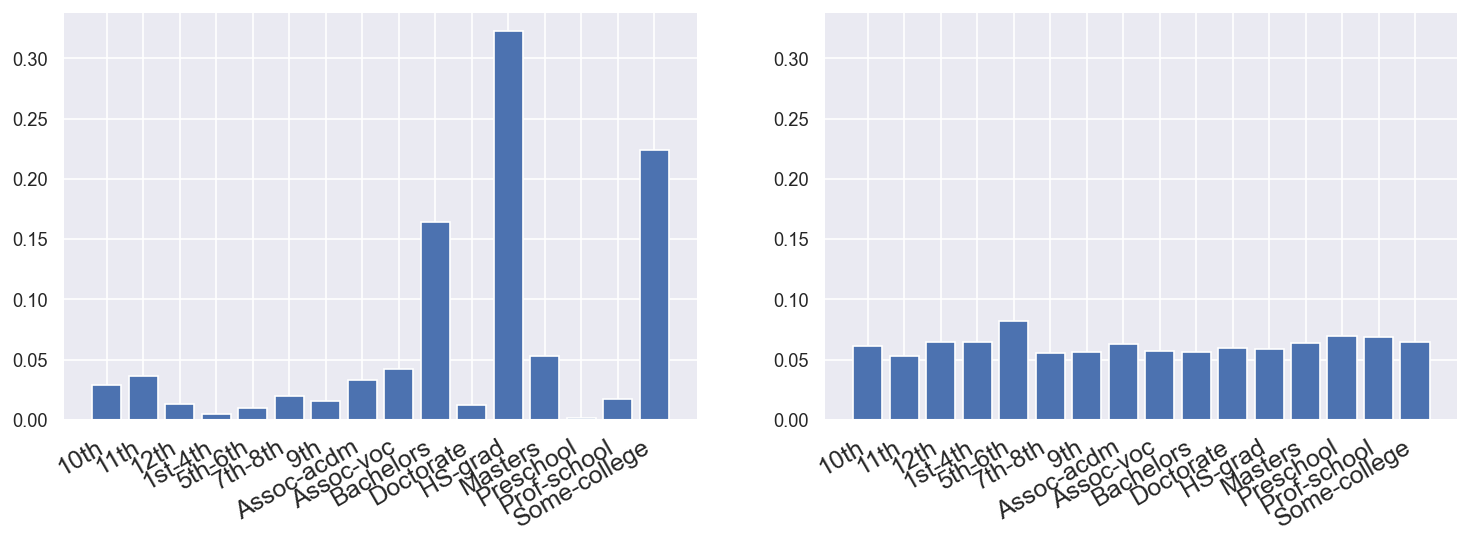

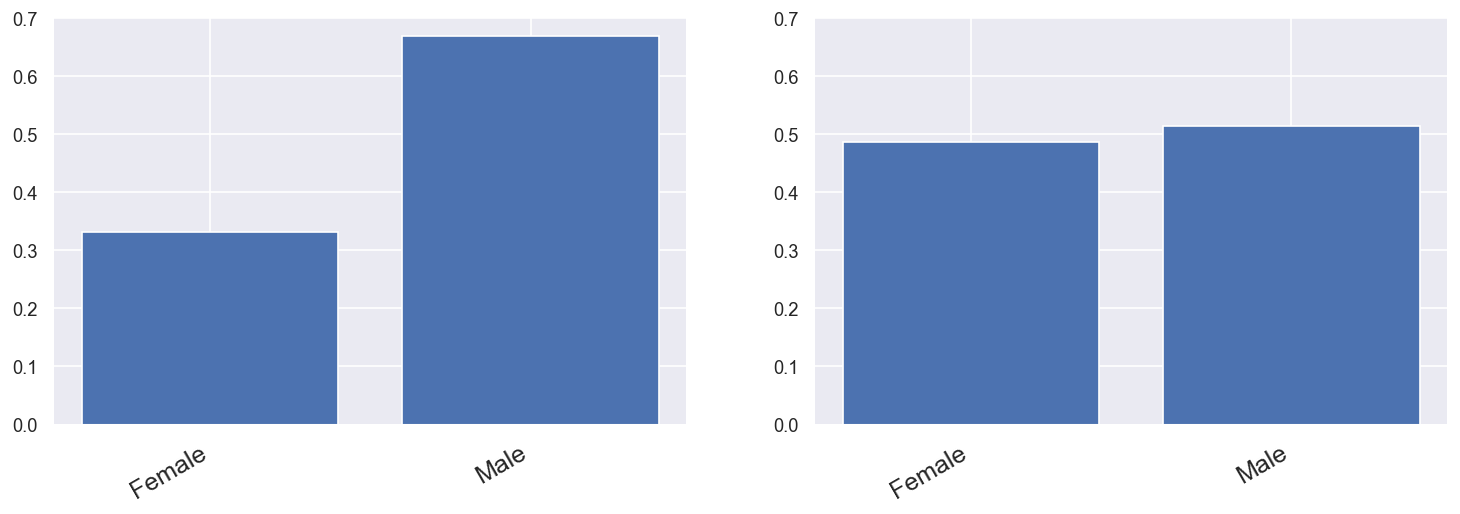

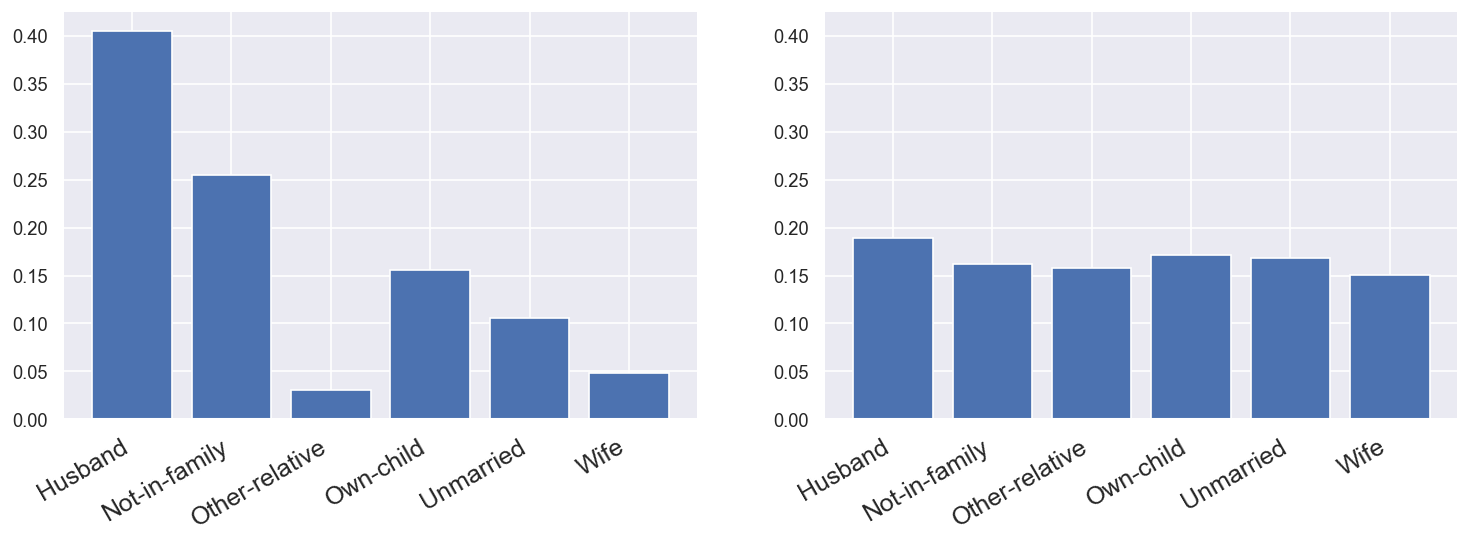

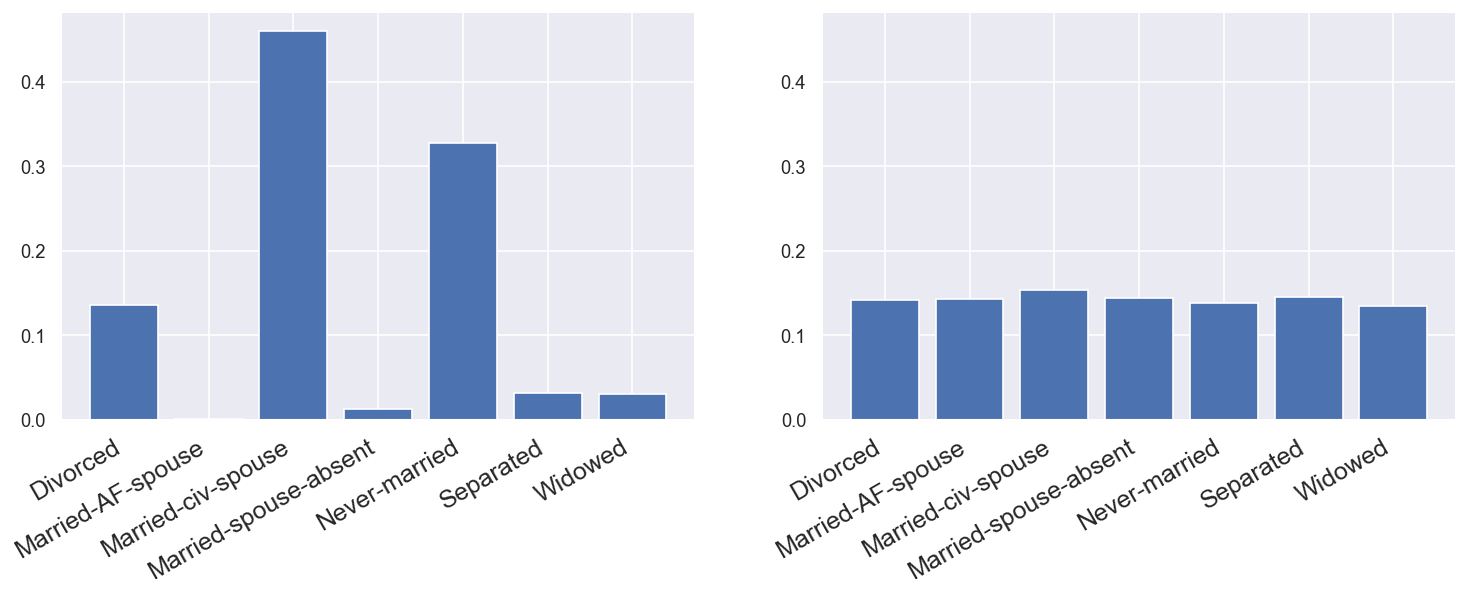

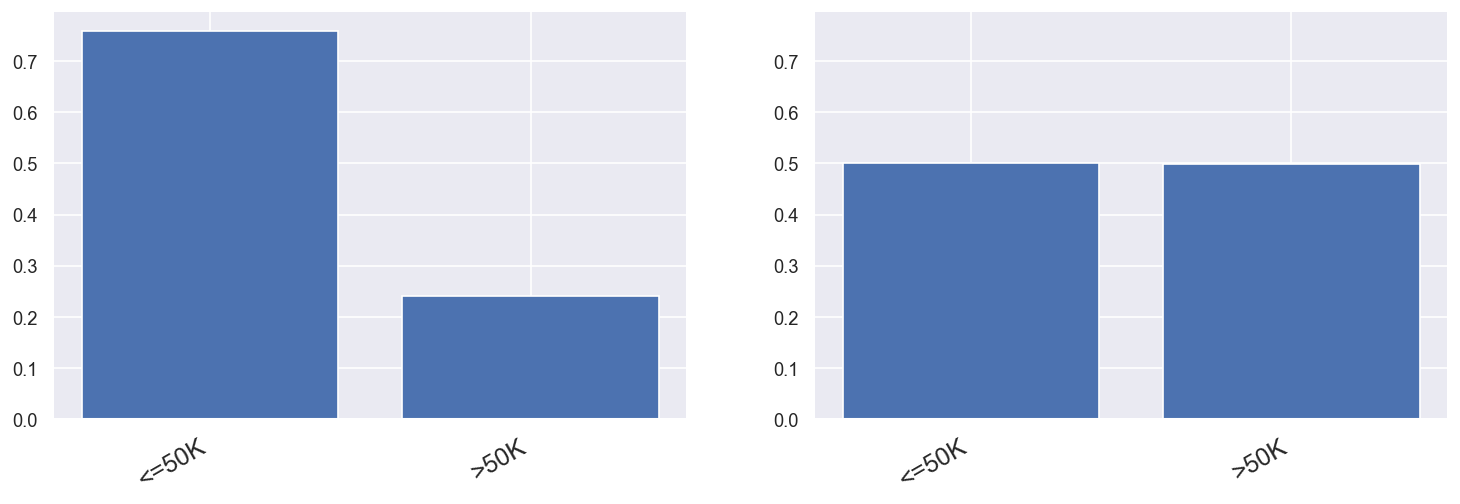

In [34]:
# Con ModelInspector podemos comparar las distribuciones de los atributos.

for attr in random.columns:
    r_inspector.compare_histograms(attr)

Evidentemente en este caso las distribuciones difieren pues los datos sintéticos son sampleados de una distribución uniforme. Veamos las correlaciones:

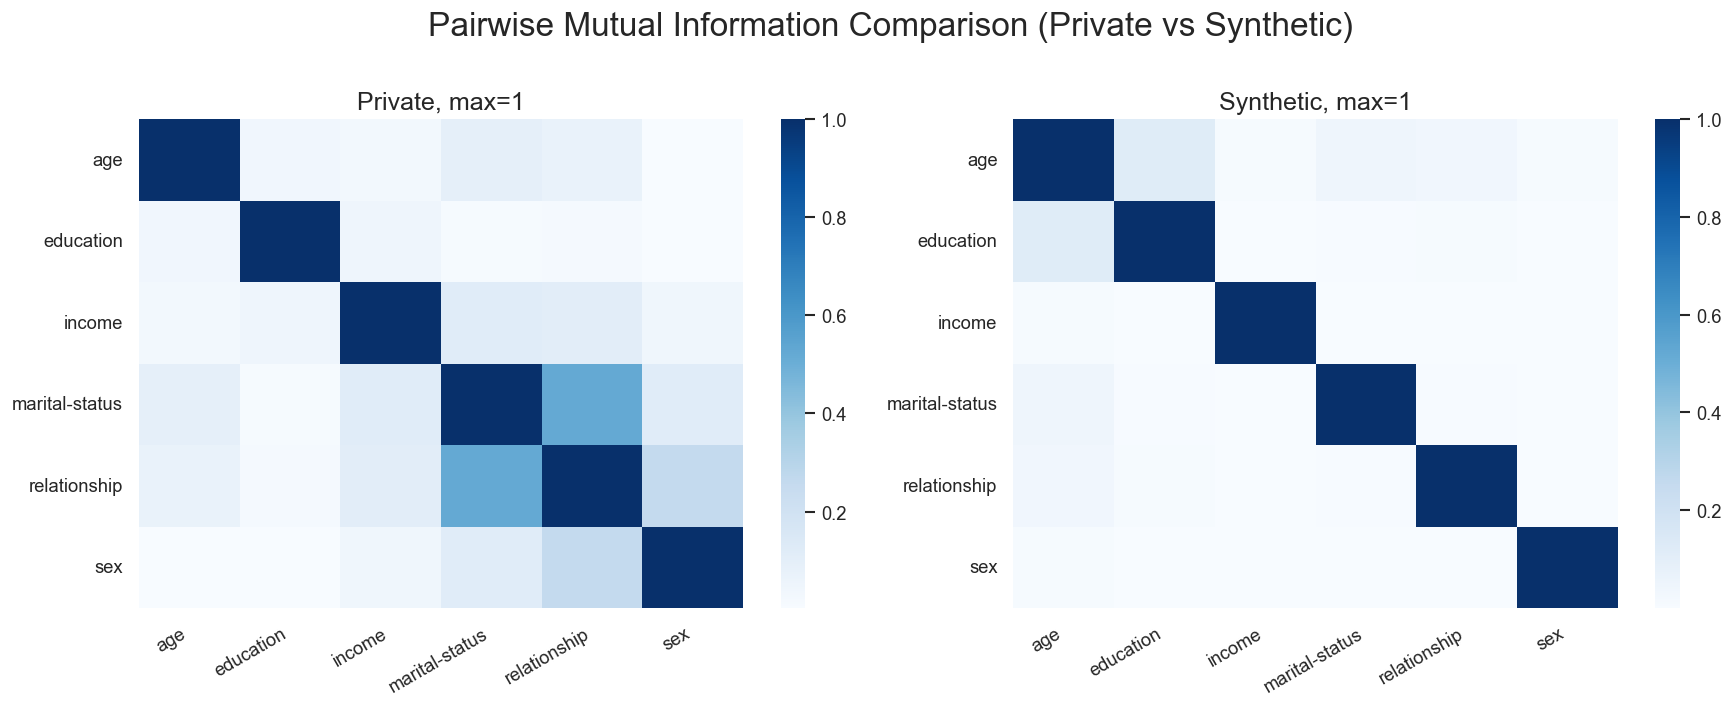

In [35]:
r_inspector.mutual_information_heatmap()

## Referencias.

[1] Ping, H., Stoyanovich, J., & Howe, B. (2017). DataSynthesizer: Privacy-Preserving Synthetic Datasets. En Proceedings of the 29th International Conference on Scientific and Statistical Database Management (SSDBM '17) (p. 42-46). Association for Computing Machinery. https://doi.org/10.1145/3085504.3091117